# Gradient Descent Algorithm

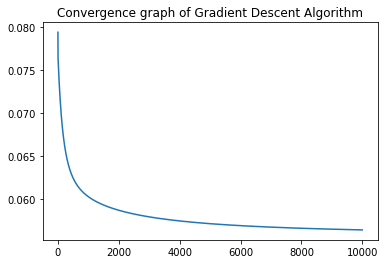

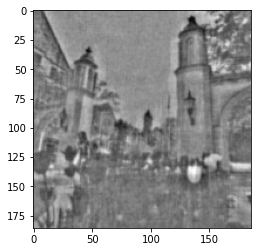

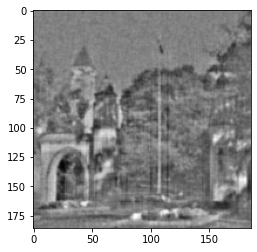

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def differential_logistic(x):
    temp = logistic_function(x)
    return temp * (1 - temp)


def matrix_flattening(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    flat = []
    for col in range(0, num_col):
        for row in range(0, num_row):
            flat = flat + [matrix[row][col]]
    return flat


def X_matrix(in_img):
    X = []
    num_row = len(in_img)
    num_col = len(in_img[0])
    for row in range(0, num_row - f_size + 1):  # - (num_row - f_size - 1)
        for col in range(0, num_col - f_size + 1):
            X = X + [matrix_flattening(in_img[row:row + f_size, col:col + f_size])]

    return np.transpose(X)


def gradient_descent(f, X, st):
    fTX = np.matmul(np.transpose(f), X)

    gfTX = logistic_function(fTX)
    gfTX1 = differential_logistic(fTX)
    gradient = np.multiply(st - gfTX, gfTX1)
    gradient = np.transpose(gradient)
    gradient = np.matmul(X, gradient)
    gradient = -(2 / N) * gradient

    e1 = st - gfTX
    MSE = np.matmul(e1, np.transpose(e1))
    MSE = MSE / N
    return gradient, MSE


if __name__ == "__main__":
    in_img = plt.imread('/home/sgx_train.jpg')
    label_img = plt.imread('/home/sg_train.jpg')
    test_img = plt.imread('/home/sgx_test.jpg')
    f_size = 15
    l_rate = 0.1
    N = 34596
    num_iter = 10000
    MSE = np.array([])

    label_img = label_img[7:-7, 7:-7]
    st = label_img.reshape(1, -1)
    st = st / 255
    s = np.transpose(st)
    X = X_matrix(in_img / 255)

    Test = X_matrix(test_img / 255)

    f_matrix = np.random.rand(f_size, f_size) * 0.01
    f = matrix_flattening(f_matrix)
    f = np.reshape(f, (225, 1))

    old_f = f

    for i in range(0, num_iter):
        gradient, MSEi = gradient_descent(old_f, X, st)
        new_f = old_f - l_rate * gradient
        old_f = new_f
        MSE = np.append(MSE, MSEi)

    x = np.arange(1, num_iter + 1)
    plt.plot(x, MSE)
    plt.title("Convergence graph of Gradient Descent Algorithm")
    plt.show()

    fTX = np.matmul(np.transpose(old_f), X)
    fTX = fTX.reshape(186, 186)
    plt.imshow(fTX, cmap='gray')
    plt.show()
    
    ftX1 = np.matmul(np.transpose(old_f), Test)
    fTX1 = ftX1.reshape(186, 186)
    plt.imshow(fTX1, cmap='gray')
    plt.savefig("test_denoised_image.png")
    




# BFGS Algorithm

BFGS Algorithm

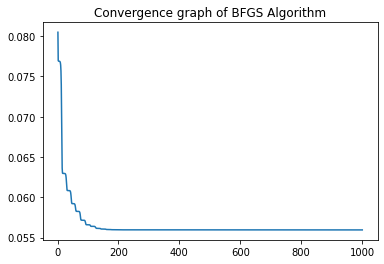

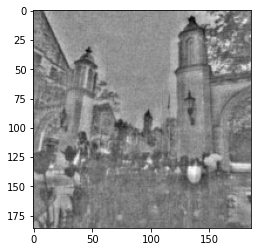

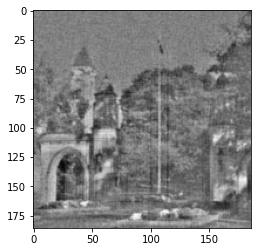

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import line_search


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def differential_logistic(x):
    temp = logistic_function(x)
    return temp * (1 - temp)


def matrix_flattening(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    flat = []
    for col in range(0, num_col):
        for row in range(0, num_row):
            flat = flat + [matrix[row][col]]
    return flat


def X_matrix(in_img):
    X = []
    num_row = len(in_img)
    num_col = len(in_img[0])
    for row in range(0, num_row - f_size + 1):  # - (num_row - f_size - 1)
        for col in range(0, num_col - f_size + 1):
            X = X + [matrix_flattening(in_img[row:row + f_size, col:col + f_size])]

    return np.transpose(X)


def gradient_descent(f, X, st):
    fTX = np.matmul(np.transpose(f), X)
    gfTX = logistic_function(fTX)
    gfTX1 = differential_logistic(fTX)
    gradient = np.multiply(st - gfTX, gfTX1)
    gradient = np.transpose(gradient)
    gradient = np.matmul(X, gradient)
    gradient = -(2 / N) * gradient

    e1 = st - gfTX
    MSE = np.matmul(e1, np.transpose(e1))
    MSE = MSE / N
    return gradient, MSE

def BFGS(Hi,bfgs_fi1,bfgs_fi,delta_fi,delta_fi1):

    p = bfgs_fi1 - bfgs_fi
    v = delta_fi1 - delta_fi

    u1d = np.dot(np.transpose(p),v)
    u2n = np.dot(Hi,v)
    u2d = np.dot(np.transpose(v),u2n)
    u1 = p/u1d
    u2 = u2n/u2d
    u = u1 - u2

    H1 = np.dot(p,np.transpose(p)) / u1d
    H21 = np.dot(np.transpose(v),Hi)
    H2 = np.dot(np.dot(Hi, v), H21) / u2d
    H31 = np.dot(u,np.transpose(u))
    H3 = u2d * H31

    Hi1 = Hi + H1 - H2 + H3

    return Hi1


if __name__ == "__main__":
    in_img = plt.imread('/home/sgx_train.jpg')
    label_img = plt.imread('/home/sg_train.jpg')
    test_img = plt.imread('/home/sgx_test.jpg')
    f_size = 15
    l_rate = 0.01
    N = 34596
    num_iter = 1000
    MSE = np.array([])

    label_img = label_img[7:-7, 7:-7]
    st = label_img.reshape(1, -1)
    st = st / 255
    s = np.transpose(st)
    X = X_matrix(in_img / 255)

    Test = X_matrix(test_img / 255)

    f_matrix = np.random.rand(f_size, f_size) * 0.01
    f = matrix_flattening(f_matrix)
    f = np.reshape(f, (225, 1))

    bfgs_fi = f
    Hi = np.eye(bfgs_fi.shape[0]) / 1000
    delta_fi = gradient_descent(bfgs_fi, X, st)
    delta_fi = delta_fi[0]
    bfgs_fi1 = bfgs_fi - np.matmul(Hi, delta_fi)
    delta_fi1 = gradient_descent(bfgs_fi1, X, st)
    MSE = np.append(MSE, delta_fi1[1])
    delta_fi1 = delta_fi1[0]

    for i in range(0, num_iter):
        Hi1 = BFGS(Hi,bfgs_fi1,bfgs_fi,delta_fi,delta_fi1)
        Hi = Hi1
        bfgs_fi = bfgs_fi1
        delta_fi = delta_fi1
        bfgs_fi1 = bfgs_fi - np.matmul(Hi, delta_fi)
        delta_fi1 = gradient_descent(bfgs_fi1, X, st)
        MSEi = delta_fi1[1]

        delta_fi1 = delta_fi1[0]

        MSE = np.append(MSE, MSEi)

    x = np.arange(1, num_iter + 2)
    plt.plot(x, MSE)
    plt.title("Convergence graph of BFGS Algorithm")
    plt.show()

    fTX = np.matmul(np.transpose(bfgs_fi1), X)
    fTX = fTX.reshape(186, 186)
    plt.imshow(fTX, cmap='gray')
    plt.show()

    # plt.savefig("denoised_image.png")

    ftX1 = np.matmul(np.transpose(bfgs_fi1), Test)
    fTX1 = ftX1.reshape(186, 186)
    plt.imshow(fTX1, cmap='gray')
    plt.show()
    # plt.savefig("test_denoised_image.png")


Explanation:

The two implemented algorithms; gradient descent and BFGS; have removed the noise but the BFGS converges before the Gradient descent as expected. 

If you notice the convergence graphs of both algorithms, with the same intialization vector, gradient descent is converging at around 1000 iterations howerver, the BFGS is converging at around 200 iterations. This illustrates the power of BFGS over the gradient descent Algorithm.
